# Joshua Rotuna - CA04

In [46]:
#Importing modules-packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from google.colab import drive
from sklearn import metrics
from sklearn.metrics import roc_auc_score
!pip install xgboost
import xgboost as xgb

## Mounting Google Drive & Reading in the dataset

In [47]:
# Mounting Google Drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Reading in the data set
cens = '/content/drive/My Drive/MSBA_Colab_2020/ML_Algorithms/CA04/census_data.csv'
cens = pd.read_csv(cens)
cens.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


## Summary Statistics

In [49]:
# Descriptive Stats
cens.head()
cens.describe()
cens.isna().sum()
cens.info()
cens.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


40012

In [50]:
# Creating Dummy Variables wihtin each column for Ensemble Model
cens_dummy = cens
cens_dummy.replace(regex={r'[a]. ': 1, r'[b]. ': 2, r'[c].': 3, r'[d]. ': 4, r'[e]. ': 5}, inplace=True)
cens_dummy.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,2,2,2,3,3,3,3,2,4,train,0
1,1,5,3,1,3,3,3,2,5,train,0
2,2,1,2,1,3,2,2,2,4,train,0
3,2,1,3,1,2,1,1,2,5,train,0
4,2,5,3,1,1,3,3,2,2,train,0


In [51]:
# Splitting the Data into Testa nd training sets
  # X training data split
x_train = cens_dummy[cens_dummy.flag=='train']
x_train = x_train.iloc[:,0:9]

  # X test data split
x_test =  cens_dummy[cens_dummy.flag=='test']
x_test = x_test.iloc[:,0:9]

  # y test split
y_test = cens_dummy[cens_dummy.flag=='test']
y_test = y_test.iloc[:,10]

  # y train split
y_train = cens_dummy[cens_dummy.flag=='train']
y_train = y_train.iloc[:,10]


## 2. Finding Optimal Value of a max_depth 

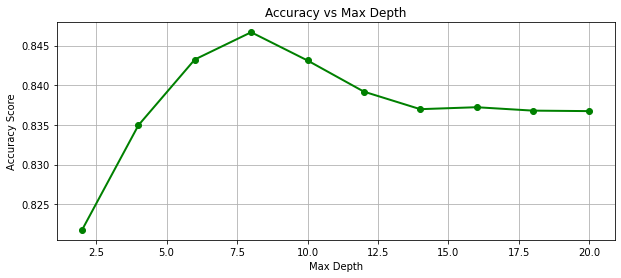

In [52]:
# Finding optimal max_depth value
results = []    # Creating blank list to append results to
max_depth_options = [2,4,6,8,10,12,14,16,18,20]

for trees in max_depth_options: # Creating for loop to iterate through each max_depth value
  model = DecisionTreeClassifier(max_depth=trees, random_state=101)   # Running DecisionTreeClassifier model
  model.fit(x_train, y_train)           # Fitting model with x_train and y_train datsets
  y_pred = model.predict(x_test)        # making predicitons
  accuracy = np.mean(y_test==y_pred)    # Calculating accuracy scores
  results.append(accuracy)              # Appending accuracy score to Results list
plt.figure(figsize=(10,4))              # Creating a graph to plot the accuracy against the max_depth value
pd.Series(results, max_depth_options).plot(color='g', marker = 'o', linewidth=2)
plt.grid()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title("Accuracy vs Max Depth")
plt.show()
  # Highest accuracy score is observed when max_depth is set to 8.
  # Therefore, max_depth = 8 is optimal value?

## Random Forest Model


Accuracy 50 : 0.8359437380996253
AUC      50 : 0.7443481454577846
Accuracy 100 : 0.8374792703150912
AUC      100 : 0.7465207221075333
Accuracy 150 : 0.8365579509858116
AUC      150 : 0.7443910518785046
Accuracy 200 : 0.837172163871998
AUC      200 : 0.744882938863996
Accuracy 250 : 0.8375406916037098
AUC      250 : 0.7459323584041069
Accuracy 300 : 0.8376021128923284
AUC      300 : 0.7465113441690865
Accuracy 350 : 0.8376021128923284
AUC      350 : 0.7462419558302236
Accuracy 400 : 0.8374792703150912
AUC      400 : 0.7459819454298077
Accuracy 450 : 0.8376021128923284
AUC      450 : 0.7463317519431779
Accuracy 500 : 0.8376635341809471
AUC      500 : 0.7470903299340659


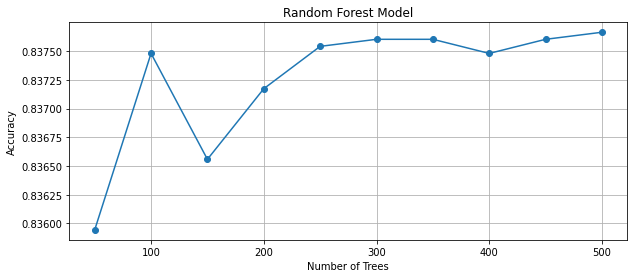

In [53]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

results = []    # Creating blank list
tree_amount = [50,100,150,200,250,300,350,400,450,500]    # identifying the number of n_estimator values
for x in tree_amount:             # Running a for loop to run the model for each n_estimator value
  model = RandomForestClassifier(n_estimators=x, max_features="auto", random_state = 0)
  model.fit(x_train, y_train)         # Fitting model with x_train and y_train datsets
  y_pred = model.predict(x_test)      # making predicitons
  accuracy = np.mean(y_test==y_pred)  # Calculating accuracy score (for each n_estimator)
  results.append(accuracy)
  auc_score =  metrics.roc_auc_score(y_test, y_pred)
  print("Accuracy",x,":", accuracy)
  print("AUC     ",x,":", auc_score)

# Displaying the accuracy scores at each given n_estimator on a plot
plt.figure(figsize=(10,4))
pd.Series(results, tree_amount).plot(marker="o")
plt.ylabel("Accuracy")
plt.xlabel("Number of Trees")
plt.title("Random Forest Model")
plt.grid()
plt.show()

## AdaBoost Model

Accuracy 50 : 0.8447269823720902
AUC      50 : 0.7390531230416888
Accuracy 100 : 0.8449112462379461
AUC      100 : 0.7460880510009302
Accuracy 150 : 0.8449112462379461
AUC      150 : 0.7463574393397931
Accuracy 200 : 0.8447884036607088
AUC      200 : 0.7460076328264228
Accuracy 250 : 0.8447884036607088
AUC      250 : 0.7460076328264228
Accuracy 300 : 0.8447884036607088
AUC      300 : 0.7460076328264228
Accuracy 350 : 0.8447884036607088
AUC      350 : 0.7460076328264228
Accuracy 400 : 0.8447884036607088
AUC      400 : 0.7460076328264228
Accuracy 450 : 0.8447884036607088
AUC      450 : 0.7460076328264228
Accuracy 500 : 0.8447884036607088
AUC      500 : 0.7460076328264228


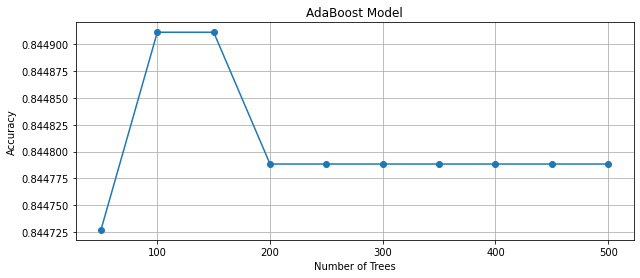

In [54]:
# AdaBoost Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

results = []    # Creating blank list
tree_amount = [50,100,150,200,250,300,350,400,450,500]    # Defining n_estimator values
for x in tree_amount:                   # Running a for loop to run the model for each n_estimator value
  model = AdaBoostClassifier(n_estimators=x)    # Calling Adaboost model
  model.fit(x_train, y_train)                   # Fitting model with necessary datasets
  y_pred = model.predict(x_test)                # Making predicitons
  accuracy = np.mean(y_test==y_pred)            # Calculating accuracy scores
  results.append(accuracy)                      # Appedning accuracy scores to results list
  auc_score =  metrics.roc_auc_score(y_test, y_pred)
  print("Accuracy",x,":", accuracy)
  print("AUC     ",x,":", auc_score)

# Displaying the accuracy scores at each given n_estimator on a plot
plt.figure(figsize=(10,4))
pd.Series(results, tree_amount).plot(marker="o")
plt.ylabel("Accuracy")
plt.xlabel("Number of Trees")
plt.title("AdaBoost Model")
plt.grid()
plt.show()

## Gradient Boosting Model

Accuracy 50 : 0.8470609913395983
AUC      50 : 0.7559362036725136
Accuracy 100 : 0.8466310423192679
AUC      100 : 0.756732293417189
Accuracy 150 : 0.8466310423192679
AUC      150 : 0.758618011789229
Accuracy 200 : 0.8466924636078865
AUC      200 : 0.7591072014412542
Accuracy 250 : 0.847122412628217
AUC      250 : 0.7598376456168019
Accuracy 300 : 0.8469381487623611
AUC      300 : 0.7598068144679949
Accuracy 350 : 0.8471838339168356
AUC      350 : 0.7602370391558727
Accuracy 400 : 0.8468153061851238
AUC      400 : 0.7595468040675789
Accuracy 450 : 0.847122412628217
AUC      450 : 0.7610049950852075
Accuracy 500 : 0.8468767274737424
AUC      500 : 0.7609339548491469


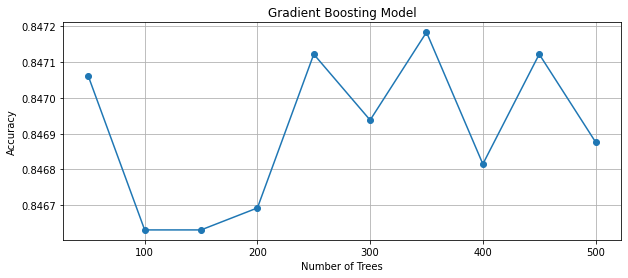

In [55]:
# Gradient Boost Model
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

results = []        # Creating blank list
tree_amount = [50,100,150,200,250,300,350,400,450,500]    # Defining n_estimator values
for x in tree_amount:
  model = GradientBoostingClassifier(n_estimators=x, random_state = 0)    #Calling GradientBoostingClassifier model
  model.fit(x_train, y_train)           # Fitting model with necessary datasets
  y_pred = model.predict(x_test)        # Making predicitons
  accuracy = np.mean(y_test==y_pred)    # Calculating accuracy scores
  results.append(accuracy)              # Appending accuracy scores to results list
  auc_score =  metrics.roc_auc_score(y_test, y_pred)

  from sklearn import metrics
  print("Accuracy",x,":", accuracy)
  print("AUC     ",x,":", auc_score)

# Displaying the accuracy scores at each given n_estimator on a plot
plt.figure(figsize=(10,4))
pd.Series(results, tree_amount).plot(marker="o")
plt.ylabel("Accuracy")
plt.xlabel("Number of Trees")
plt.title("Gradient Boosting Model")
plt.grid()
plt.show()

## XGBoost Model

Accuracy 50 : 0.846446778453412
AUC      50 : 0.7508647149263534
Accuracy 100 : 0.847122412628217
AUC      100 : 0.756784577776356
Accuracy 150 : 0.8469995700509797
AUC      150 : 0.7582306935220714
Accuracy 200 : 0.846446778453412
AUC      200 : 0.7592157534311023
Accuracy 250 : 0.8467538848965052
AUC      250 : 0.7597759833191879
Accuracy 300 : 0.8466924636078865
AUC      300 : 0.7600051625707972
Accuracy 350 : 0.846446778453412
AUC      350 : 0.759125957318148
Accuracy 400 : 0.8465081997420306
AUC      400 : 0.7591661664054017
Accuracy 450 : 0.8462625145875561
AUC      450 : 0.7585563494916153
Accuracy 500 : 0.8462625145875561
AUC      500 : 0.7591849222822954


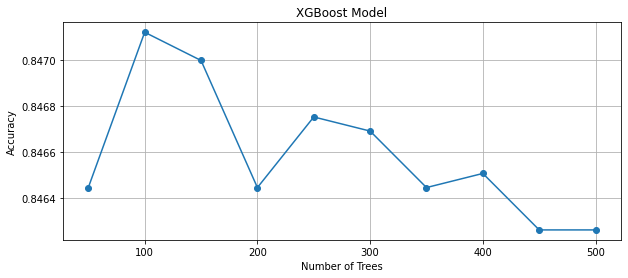

In [56]:
# XGBoost Model
results = []        # Creating blank list
tree_amount = [50,100,150,200,250,300,350,400,450,500]      # Defining set of n_estimators
for x in tree_amount: 
  model = xgb.XGBClassifier(n_estimators=x, random_state = 0)   # Calling XGBClassifier model             
  model.fit(x_train, y_train)               # Fitting model with necessary datasets
  y_pred = model.predict(x_test)            # Making predictions
  accuracy = np.mean(y_test==y_pred)        # Calculating accuracy scores
  results.append(accuracy)                  # Appending accuracy scores to result slist
  auc_score =  metrics.roc_auc_score(y_test, y_pred)

  from sklearn import metrics
  print("Accuracy",x,":", accuracy)
  print("AUC     ",x,":", auc_score)

plt.figure(figsize=(10,4))
pd.Series(results, tree_amount).plot(marker="o")
plt.ylabel("Accuracy")
plt.xlabel("Number of Trees")
plt.title("XGBoost Model")
plt.grid()
plt.show()


## Performance Comparison


In [57]:
#Create a new dataframe to iterate through each model fro Accuracy and AUC scores
performance_df = pd.DataFrame(columns = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGB'],  
                   index = ['Accuracy', 'AUC']) 
performance_df

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,NaN,NaN,NaN,NaN
AUC,NaN,NaN,NaN,NaN


In [58]:
from sklearn import metrics
 

n_estimate = 200      # Identifying n_estimator for each iteration

def performance_comparison():     # Creating function to iterate through each index of the previously created table
  for index, row in performance_df.iterrows():
    if index == "Accuracy":

      # Random Forest 
      random_forest = RandomForestClassifier(n_estimators = n_estimate, max_features="auto", random_state=0)
      random_forest.fit(x_train, y_train)
      random_forest_pred = random_forest.predict(x_test)
      accuracy = accuracy_score(y_test, random_forest_pred)     
      performance_df.at[index, 'Random Forest'] = accuracy.round(5)     # Putting the accuracy score into the appropriate location in the dataset

      # AdaBoost 
      adaboost = AdaBoostClassifier(n_estimators = n_estimate, random_state=0)
      adaboost.fit(x_train, y_train)
      adaboost_pred = adaboost.predict(x_test)
      accuracy = accuracy_score(y_test, adaboost_pred) 
      performance_df.at[index, 'AdaBoost'] = accuracy.round(5)          # Putting the accuracy score into the appropriate location in the dataset

      # Gradient
      gradient = GradientBoostingClassifier(n_estimators = n_estimate, random_state=0)
      gradient.fit(x_train, y_train)
      gradient_pred = gradient.predict(x_test)
      accuracy = accuracy_score(y_test, gradient_pred)      
      performance_df.at[index, 'Gradient Boost'] = accuracy.round(5)    # Putting the accuracy score into the appropriate location in the dataset

      # XGB 
      xgb_model = xgb.XGBClassifier(n_estimators=x, random_state = 101)
      xgb_model.fit(x_train, y_train)
      xgb_model_pred = xgb_model.predict(x_test)
      accuracy = accuracy_score(y_test, xgb_model_pred)     
      performance_df.at[index, 'XGB'] = accuracy.round(5)               # Putting the accuracy score into the appropriate location in the dataset

    if index == "AUC":
      #Random Forest AUC score
      AUC = roc_auc_score(y_test, random_forest_pred)
      performance_df.at[index, 'Random Forest'] = AUC                   # Putting the AUC score into the appropriate location in the dataset
      # Ada Boost AUC score
      AUC = roc_auc_score(y_test, adaboost_pred)
      performance_df.at[index, 'AdaBoost'] = AUC                        # Putting the AUC score into the appropriate location in the dataset
      # Gradient Boost AUC score
      AUC = roc_auc_score(y_test, gradient_pred)  
      performance_df.at[index, 'Gradient Boost'] = AUC                  # Putting the AUC score into the appropriate location in the dataset
      # XGB AUC score
      AUC = roc_auc_score(y_test, xgb_model_pred)
      performance_df.at[index, 'XGB'] = AUC                             # Putting the accuracy score into the appropriate location in the dataset

      print("   random_state was set to 0 for all models")
      print("   Learning rate was set to default in every model possible")



performance_comparison()

performance_df

   random_state was set to 0 for all models
   Learning rate was set to default in every model possible


,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.83717,0.84479,0.84669,0.84626
AUC,0.744883,0.746008,0.759107,0.759185
